# Homework Assignment #2 (Individual)
## Pandas Review and Python Classes

### <p style="text-align: right;"> &#9989; Sarah Koehler
### <p style="text-align: right;"> &#9989; koehle61

### Goals for this homework assignment
By the end of this assignment, you should be able to:
- Write a generalizable class to store data
- Write subclasses that inherit general variables and methods from a parent class
- Identify key pieces of information that need to be stored as class variables
- Write methods that fetch and modify class variables 
- Write a function that instantiates new objects given some initial set of parameters

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **100 points** possible on this assignment. Point values for each part are included in the section headers and question prompts.

**This assignment is due in roughly two weeks from now at 11:59 pm on February 17th.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2.  Submission instructions can be found at the end of the notebook.

---
# Part 0: Add to your Git repository to track your progress on your assignment (5 points)

For this assignment, you're going to add it to the `cmse202-s23-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s23-turnin` repository and create a new directory called `hw-02`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s23-turnin`" repository inside the `hw-02` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

git clone https://github.com/koehle61/CMSE202-s23-turnin

---

### &#128721; STOP (3 Points)
**Pause to commit your changes to your Git repository!**
Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

# Part 1: Loading a new dataset and visualize it (22 Points)

An important aspect of the recent lessons has been to look at an unknown dataset, use `pandas` to load it into a dataframe, analyze it, and finally visualize it. In the following, we will download a two-part dataset from the web and analyze it. It goes in a familiar direction: Animals. 

We will look at the following datasets

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW2/zoo.csv` 

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW2/class.csv`

which [comes from here](https://www.kaggle.com/datasets/uciml/zoo-animal-classification).




## Part 1.1 Downloading the Data (2 points)

Write the commands you used to download the datasets in the Jupyter notebook cell below.

In [ ]:
#Write code here
curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW2/zoo.csv

curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW2/class.csv

## Part 1.2 Viewing the Dataset using the Command Line (2 points)

Open a terminal and use the **commandline** to view the datasets with the tools you learned in class or others that you know. Write the commands you used in the command line below.

In [ ]:
#Write your commands here
head zoo.csv
vi zoo.csv
head class.csv
vi class.csv

## Part 1.3 Describe the Data (2 points)

Look at both datasets (`class.csv`, `zoo.csv`). Describe the contents of both datasets (E.g., the column kinds, what they represent, etc.). Pay close attention to the column `class_type` in the `zoo.csv` dataset and the column `class_number` in the `class.csv`.

<font size=6 color="#009600">&#9998;</font> In zoo.csv, all but the first column are integers, while the first column are strings of the kind of animal that it is. The column class_type is an integer between 1 and 7. All the other columns are different features an animal could have. For those columns, except for the legs column, they all have the values 0 or 1 depending on whether that animal has that feature. 0 if the animal doesn't and 1 if the animal does. The legs column consists of an integer of how many legs the animal has.

In class.csv, there are four columns. The first two columns are integers and the second two columns are strings. The first column called class_number corresponds to the class_type in the zoo.csv file. This file has the number of animals in a certain class, what the class is called and all the animal names that go in that class.

## Part 1.4: Read in the Datasets with `pandas` (2 points)

&#9989; Use pandas to read in the `zoo.csv` and `class.csv` files into DataFrames.

In [1]:
#Write code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
zoo_df = pd.read_csv("zoo.csv", delimiter=",")
class_df = pd.read_csv("class.csv", delimiter=",")

## Part 1.5 Counting Classes (2 Points). 

Look back in the PCA/ICA and see how we used `groupby` to find the number of Iris species and determine their statistical properties. Use the same methodology on the `zoo` DataFrame to find out how many of each there are (**not how many classes but e.g. how many mammals, fish, ...**). Use the `class.csv` to check your answer. 

In [3]:
zoo_grouped = zoo_df.groupby(by="class_type")
zoo_grouped.describe()

hair                                             feathers       \
           count     mean       std  min  25%  50%  75%  max    count mean   
class_type                                                                   
1           41.0  0.95122  0.218085  0.0  1.0  1.0  1.0  1.0     41.0  0.0   
2           20.0  0.00000  0.000000  0.0  0.0  0.0  0.0  0.0     20.0  1.0   
3            5.0  0.00000  0.000000  0.0  0.0  0.0  0.0  0.0      5.0  0.0   
4           13.0  0.00000  0.000000  0.0  0.0  0.0  0.0  0.0     13.0  0.0   
5            4.0  0.00000  0.000000  0.0  0.0  0.0  0.0  0.0      4.0  0.0   
6            8.0  0.50000  0.534522  0.0  0.0  0.5  1.0  1.0      8.0  0.0   
7           10.0  0.00000  0.000000  0.0  0.0  0.0  0.0  0.0     10.0  0.0   

            ... domestic      catsize                                          \
            ...      75%  max   count      mean       std  min  25%  50%  75%   
class_type  ...                                                                 
1           ...      0.0  1.0    41.0  0.780488  0.419058  0.0  1.0  1.0  1.0   
2           ...      0.0  1.0    20.0  0.300000  0.470162  0.0  0.0  0.0  1.0   
3           ...      0.0  0.0     5.0  0.200000  0.447214  0.0  0.0  0.0  0.0   
4           ...      0.0  1.0    13.0  0.307692  0.480384  0.0  0.0  0.0  1.0   
5           ...      0.0  0.0     4.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
6           ...      0.0  1.0     8.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
7           ...      0.0  0.0    10.0  0.100000  0.316228  0.0  0.0  0.0  0.0   

                 
            max  
class_type       
1           1.0  
2           1.0  
3           1.0  
4           1.0  
5           0.0  
6           0.0  
7           1.0  

[7 rows x 128 columns]

<font size=6 color="#009600">&#9998;</font> The amount of animals for each class: Class 1 - 41, Class 2 - 20, Class 3 - 5, Class 4 - 13, Class 5 - 4, Class 6 - 8, Class 7 - 10. When I looked at the class.csv file, I have the same answers as those in that final.

## 1.6 Visualizing the Data (10 points)

&#9989; Similar to the iris dataset, where we classified iris flowers into specific species, we want to classify animal properties into animal classes. Let's say we want to tell fish and mammals apart. Make two scatter plots to cleanly separate the classes using attributes from your `zoo` dataset. Use different colors and different symbols for fish and mammals.

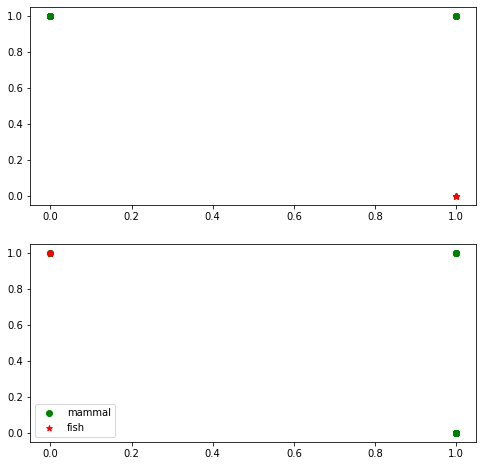

In [4]:
#Write your code here
fish = zoo_df[zoo_df["class_type"] == 4]
mammal = zoo_df[zoo_df["class_type"] == 1]

plt.figure(figsize = (8,8))
plt.subplot(2,1,1)
plt.scatter(mammal["fins"], mammal["milk"], color = "g", marker = "o", label = "mammal")
plt.scatter(fish["fins"], fish["milk"], color = "r", marker = "*", label = "fish")

plt.subplot(2,1,2)
plt.scatter(mammal["hair"], mammal["aquatic"], color = "g", marker = "o", label = "mammal")
plt.scatter(fish["hair"], fish["aquatic"], color = "r", marker = "*", label = "fish")
plt.legend()

## 1.7 Reflecting on the Different Types of Data (2 points)

Look at the scatter plots you made to classify fish and mammals in the previous part and compare it to the scatter plots we made to separate the iris dataset. What differences do you notice?

<font size=6 color="#009600">&#9998;</font> In these plots, some of the animals have certain attributes while other animals do not have those attributes. In the iris scatter plots the all of the flowers have the same attributes that are describing them just different sizes. In the iris plots the different flowers could be harder to distinguish because some of the different kind of flowers can have similar size of the attributes. When comparing the mammals and fish, you can separate them easily because mammals and fish don't have the same attributes.

---
### &#128721; STOP (3 Point)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

# Part 2 Extending classes (41 Points)

For the next set of question, We will work once more with the `Animal` and `Zoo` class. Below is a version of the `Animal` class that we will build off of.



In [5]:
#Example class to build off of

class Animal(object):
    """
    This is an Animal class, used to store information about animals in the Zoo.
    """

    def __init__(self, kind, required_area=0):
        """ Initialize the Animal object.
        Inputs are
        kind: the type of animal (string)
        required_area: square meters (int)
        """
        self.kind = kind
        self.required_area = required_area


    def set_required_area(self, area):
        """ Set area required for a single animal. """
        self.required_area = area

    def set_kind(self, kind):
        """ Set the kind of the animal """
        self.kind = kind

    def get_kind(self):
        """ Return animal's kind. """
        return self.kind

    def get_required_area(self):
        """ Return area required for a single animal. """
        return self.required_area

## Part 2.1 Extending the `Animal` Class (18 Points)

### Part 2.1.1 Building a Test Animal (3 Points)

Before we start making changes to our classes, let's start by creating some test/example instances of them. In the cell below, pick your favorite animal and a fun name and create a new `Animal` object.


In [9]:
#Write your code here
george = Animal("giraffe")

### Part 2.1.2 Adding in Additional Information (5 Points)


Before we can begin building our zoo we need more information about the needs of our animals. Specifically, we need to think about the different habitats the animals live in. We now have that information from your dataframe. For our zoo, we will be building aquatic habitats, grassland habitats, and aviaries. Ultimately, we're going to need to know how big the different habitats will need to be.

&#9989; Extend the `Animal` class given above to store information to incorporate habitat information in the cell below.

In [8]:
#Write out your new Animal class here
class Animal(object):
    """
    This is an Animal class, used to store information about animals in the Zoo.
    """

    def __init__(self, kind, required_area=0, habitat=""):
        """ Initialize the Animal object.
        Inputs are
        kind: the type of animal (string)
        required_area: square meters (int)
        """
        self.kind = kind
        self.required_area = required_area
        self.habitat = habitat

    def set_required_area(self, area):
        """ Set area required for a single animal. """
        self.required_area = area

    def set_kind(self, kind):
        """ Set the kind of the animal """
        self.kind = kind
        
    def set_habitat(self, habitat):
        """ Set the habitat the animal lives in. """
        self.habitat = habitat

    def get_kind(self):
        """ Return animal's kind. """
        return self.kind

    def get_required_area(self):
        """ Return area required for a single animal. """
        return self.required_area
    
    def get_habitat(self):
        """ Return the habitat the animal lives in. """
        return self.habitat

### Part 2.1.3 Calculating Required Area (10 Points)

Now that we have our habitat information, we can use that to calculate the required area. First, we're going to assume that animals living in different habitats require the following amount of area:

 * aquatic : 10 $m^2$ per animal
 * aviary : 20 $m^2$ per animal
 * grassland : 30 $m^2$ per animal



&#9989; In the `__init__` method, write a piece of code that uses the information above to determine the area required for the animal and set the `required_area` attribute.

In [14]:
#Write out your new Animal class here
class Animal(object):
    """
    This is an Animal class, used to store information about animals in the Zoo.
    """

    def __init__(self, kind, habitat = "", required_area=0):
        """ Initialize the Animal object.
        Inputs are
        kind: the type of animal (string)
        required_area: square meters (int)
        """
        self.kind = kind
        if (habitat == "aquatic"):
            self.required_area = 10
            
        elif (habitat == "aviary"):
            self.required_area = 20
            
        elif (habitat == "grassland"):
            self.required_area = 30
            
        else:
            self.required_area = required_area
            
        self.habitat = habitat

    def set_required_area(self, area):
        """ Set area required for a single animal. """
        self.required_area = area

    def set_kind(self, kind):
        """ Set the kind of the animal """
        self.kind = kind
        
    def set_habitat(self, habitat):
        """ Set the habitat the animal lives in. """
        self.habitat = habitat

    def get_kind(self):
        """ Return animal's kind. """
        return self.kind

    def get_required_area(self):
        """ Return area required for a single animal. """
        return self.required_area
    
    def get_habitat(self):
        """ Return the habitat the animal lives in. """
        return self.habitat

## Part 2.2: Extending the `Zoo` Class (23 Points)

Now we want to extend our `Zoo` class, so we can determine the total amount of area we'll need for each habitat. We'll do this by building off of our original `zoo` class given below.

In [11]:
#Example class to build off of

class Zoo:
    """
        Class for Zoo object.
    """
    def __init__(self, name):
        """ Initialize the Animal object.
        Inputs are
        name: name of the zoo (string)
        animals: collection (dictionary) of animal objects
        """
        self.name = name
        self.animals = {}

    def add_animal(self, animal):
        """ Adds an animal to the zoo. """
        # we use animal's name as a key in the dictionary
        kind = animal.get_kind()
        self.animals[kind] = animal

    def add(self, animal):
        """ Shorter name of function to add animals to the Zoo. """
        self.add_animal(animal)

    def get_animals(self):
        """ Return all animals in the zoo."""
        return self.animals

    def remove(self, name):
        """ Remove animal from the Zoo for given name. If the name does not exist, error is printed. """
        if name in self.animals:
            # yes, animal with given name is in the Zoo
            del self.animals[name]
        else:
            print("Animal with given name is not in", self.name, "Zoo.")

    def get_animal_kinds(self, sort=False):
        """ Return animal kinds in the Zoo. Return sorted kinds if parameters sorted==True"""
        kinds = []
        
        for key in self.animals.keys():
            # get animal kinds and store them into list
            kinds.append(self.animals[key].get_kind())

        if sort == True:
            # we have to return sorted kinds; so sort the kinds
            kinds = sorted(kinds)

        return kinds

    def number_animals(self):
        """ Return number of animals in the Zoo."""
        return len(self.animals)

    def total_area(self):
        """ Return the total Zoo area to host all animals defined in the object. """
        area = 0

        for key in self.animals:
            # get area for all animals in the zoo
            area += self.animals[key].get_required_area()

        return area



### 2.2.1 Building an Example `Zoo` (3 Points)



&#9989; To start, build an example `zoo` object. Add the example `animal` object you made in 2.1.1 to the zoo.

In [12]:
#Write your code for constructing an example zoo here
pittsburgh_zoo = Zoo("Pittsburgh Zoo")
pittsburgh_zoo.add_animal(george)

### 2.2.2 Getting Total Required Area (15 Points)

&#9989; Extend your Zoo class with functionality to calculate the required areas for each type of habitat. There are several ways to do this. Here are the requirements:

1. You should be able to (easily) access the total required area for each habitat at any time using the `Zoo` object. (This can be best achieved by using class attributes.)
2. You should be able to easily recalculate the total required area for each habitat if/when new animals are added to the zoo.

Finally, you should be able to print off the required area for each habitat. E.g., 

- Grassland: 1200 Square Meters
- Aquatic: 600 Square Meters
- Aviary: 300 Square Meters

You can decide whether to do this inside of the `Zoo` class or with another piece of code. 

In [16]:
#Write out your new Zoo class here
class Zoo:
    """
        Class for Zoo object.
    """
    def __init__(self, name):
        """ Initialize the Animal object.
        Inputs are
        name: name of the zoo (string)
        animals: collection (dictionary) of animal objects
        """
        self.name = name
        self.animals = {}

    def add_animal(self, animal):
        """ Adds an animal to the zoo. """
        # we use animal's name as a key in the dictionary
        kind = animal.get_kind()
        self.animals[kind] = animal

    def add(self, animal):
        """ Shorter name of function to add animals to the Zoo. """
        self.add_animal(animal)

    def get_animals(self):
        """ Return all animals in the zoo."""
        return self.animals

    def remove(self, name):
        """ Remove animal from the Zoo for given name. If the name does not exist, error is printed. """
        if name in self.animals:
            # yes, animal with given name is in the Zoo
            del self.animals[name]
        else:
            print("Animal with given name is not in", self.name, "Zoo.")

    def get_animal_kinds(self, sort=False):
        """ Return animal kinds in the Zoo. Return sorted kinds if parameters sorted==True"""
        kinds = []
        
        for key in self.animals.keys():
            # get animal kinds and store them into list
            kinds.append(self.animals[key].get_kind())

        if sort == True:
            # we have to return sorted kinds; so sort the kinds
            kinds = sorted(kinds)

        return kinds

    def number_animals(self):
        """ Return number of animals in the Zoo."""
        return len(self.animals)

    def total_area(self):
        """ Return the total Zoo area to host all animals defined in the object. """
        area = 0

        for key in self.animals:
            # get area for all animals in the zoo
            area += self.animals[key].get_required_area()

        return area
    
    def get_habitat_areas(self):
        ''' Print the habitat areas for the animals in the zoo. '''
        aquatic_area = 0
        aviary_area = 0
        grassland_area = 0
        
        for key in self.animals:
            # get the area of each of the habitats in the zoo
            if (self.animals[key].get_habitat() == "aquatic"):
                aquatic_area += self.animals[key].get_required_area()
            elif (self.animals[key].get_habitat() == "aviary"):
                aviary_area += self.animals[key].get_required_area()
            elif (self.animals[key].get_habitat() == "grassland"):
                grassland_area += self.animals[key].get_required_area()
                
        print("Grassland:", grassland_area, "Square Meters")
        print("Aquatic:", aquatic_area, "Square Meters")
        print("Aviary:", aviary_area, "Square Meters")
    

### 2.2.3 Testing your New `Zoo` class (5 Points)

&#9989; Test out your new `Zoo` class by constructing three new `Animal` objects--one for each habitat--and then adding them to a new `Zoo` object. Test out the two methods you added in the previous part to ensure that they work correctly.

In [18]:
#Write your code for testing the Zoo class here
buffalo = Animal("buffalo", "grassland")
shark = Animal("shark", "aquatic")
bluejay = Animal("blue jay", "aviary")

pittsburgh_zoo = Zoo("Pittsburgh Zoo")

pittsburgh_zoo.add_animal(buffalo)
pittsburgh_zoo.add_animal(shark)
pittsburgh_zoo.add_animal(bluejay)

pittsburgh_zoo.get_habitat_areas()

Grassland: 30 Square Meters
Aquatic: 10 Square Meters
Aviary: 20 Square Meters


---
### &#128721; STOP (3 Point)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository. Please make a meaningful commit message

---

# Part 3: Filling your Zoo (20 Points)

We now have a working zoo that understands how habitats work. We want to fill it with the animals from `zoo.csv` in the `pandas` DataFrame. First we are learning how to loop over individual rows of a `pandas` DataFrame and then we are adding this to the zoo. 

## Part 3.1 Sorting Animals (5 points)

&#9989; We are demonstrating below how we loop over individual rows of a `pandas` `DataFrame` and access the properties of an animal for each row. I'm keeping in mind that the grassland should not have airborne creatures. Please add an if-statement for animals going to the aquatic habitat and the aviary habitat. 

In [20]:
#Extend the following code for all habitat types

# to limit the output you can write zoo_df.sample(20).iterrows() to give you a sample of 20 animals
for i, animal_row in zoo_df.sample(20).iterrows():
    if (animal_row.legs > 0) and (animal_row.airborne == 0) and (animal_row.aquatic == 0):
        print("{0} needs to go to the grassland habitat ".format(animal_row['animal_name']))
    elif (animal_row.aquatic == 1):
        print("{0} needs to go to the aquatic habitat ".format(animal_row['animal_name']))
    elif (animal_row.airborne == 1):
        print("{0} needs to go to the aviary habitat ".format(animal_row['animal_name']))

stingray needs to go to the aquatic habitat 
flamingo needs to go to the aviary habitat 
porpoise needs to go to the aquatic habitat 
pussycat needs to go to the grassland habitat 
moth needs to go to the aviary habitat 
cheetah needs to go to the grassland habitat 
gnat needs to go to the aviary habitat 
piranha needs to go to the aquatic habitat 
seasnake needs to go to the aquatic habitat 
antelope needs to go to the grassland habitat 
raccoon needs to go to the grassland habitat 
parakeet needs to go to the aviary habitat 
oryx needs to go to the grassland habitat 
aardvark needs to go to the grassland habitat 
lobster needs to go to the aquatic habitat 
mole needs to go to the grassland habitat 
starfish needs to go to the aquatic habitat 
chicken needs to go to the aviary habitat 
bear needs to go to the grassland habitat 
squirrel needs to go to the grassland habitat 


## Part 3.2 Making your Zoo (10 points)

&#9989; Now that we have learned how to loop over a dataframe, we want to add all the animals to the zoo. Use the for-loop and instantiate an animal object (using the new and improved animal object) and add it to the zoo. 

In [30]:
#Write your code for constructing a complete zoo here
final_zoo = Zoo("Final Zoo")

for i, animal_row in zoo_df.iterrows():
    animal_habitat = ""
    
    if (animal_row.legs > 0) and (animal_row.airborne == 0) and (animal_row.aquatic == 0):
        animal_habitat = "grassland"
    elif (animal_row.aquatic == 1):
        animal_habitat = "aquatic"
    elif (animal_row.airborne == 1):
        animal_habitat = "aviary"
        
    new_animal_obj = Animal(animal_row["animal_name"], animal_habitat)
    
    final_zoo.add_animal(new_animal_obj)

## 3.3 Showing off your Zoo (5 Points)

&#9989; Now that you have built your `Zoo` object with all of its `Animal`s, it's time to show it off. In the cell below, calculate and print the total area required for each habitat. 

In [32]:
#Write your code for showing off your zoo object

final_zoo.get_habitat_areas()

Grassland: 1230 Square Meters
Aquatic: 350 Square Meters
Aviary: 380 Square Meters


---

### &#128721; STOP (3 Point)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

### Congratulations, you're done!

&#169; Copyright 2022,  Department of Computational Mathematics, Science and Engineering at Michigan State University